In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("melb_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Missing Data Handling

In [5]:
# count of missing data by column name

data.isna().sum()/len(data)*100


Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
dtype: float64

In [6]:
# removing BuildingArea & Yearbuilt for excessing missing data
data = data.drop(["BuildingArea","YearBuilt"],axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  CouncilArea    12211 non-null  object 
 15  Lattitude      13580 non-null  float64
 16  Longtitude     13580 non-null  float64
 17  Regionname     13580 non-null  object 
 18  Proper

In [8]:
data.CouncilArea.value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64

### Approach 1 (Drop rows with Missing values)

In [9]:
temp1 = data.dropna() #drops all rows with any missing data

temp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12211 entries, 0 to 12212
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         12211 non-null  object 
 1   Address        12211 non-null  object 
 2   Rooms          12211 non-null  int64  
 3   Type           12211 non-null  object 
 4   Price          12211 non-null  float64
 5   Method         12211 non-null  object 
 6   SellerG        12211 non-null  object 
 7   Date           12211 non-null  object 
 8   Distance       12211 non-null  float64
 9   Postcode       12211 non-null  float64
 10  Bedroom2       12211 non-null  float64
 11  Bathroom       12211 non-null  float64
 12  Car            12211 non-null  float64
 13  Landsize       12211 non-null  float64
 14  CouncilArea    12211 non-null  object 
 15  Lattitude      12211 non-null  float64
 16  Longtitude     12211 non-null  float64
 17  Regionname     12211 non-null  object 
 18  Proper

### Approach 2 (Data imputation over Missing Values)

In [10]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  CouncilArea    12211 non-null  object 
 15  Lattitude      13580 non-null  float64
 16  Longtitude     13580 non-null  float64
 17  Regionname     13580 non-null  object 
 18  Proper

In [11]:
data["Car"].fillna(data["Car"].median(),inplace=True)

In [12]:
data["CouncilArea"].value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64

In [13]:
## replace the missing values with category with highest frequency (mode)

data["CouncilArea"].fillna(data["CouncilArea"].value_counts().reset_index().loc[0][0],inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  CouncilArea    13580 non-null  object 
 15  Lattitude      13580 non-null  float64
 16  Longtitude     13580 non-null  float64
 17  Regionname     13580 non-null  object 
 18  Proper

## Data Centering and Scaling

In [15]:
numeric_col =[]

for i in ["Price","Distance","Landsize"] :
    if(data[i].dtype.name != 'object'):
        data[i]=(data[i]-data[i].mean())/data[i].std()
        
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,0.632425,S,Biggin,3/12/2016,-1.301437,3067.0,2.0,1.0,1.0,-0.089312,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,-0.063637,S,Biggin,4/02/2016,-1.301437,3067.0,2.0,1.0,0.0,-0.100839,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,0.608962,SP,Biggin,4/03/2017,-1.301437,3067.0,3.0,2.0,0.0,-0.106352,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,-0.353012,PI,Biggin,4/03/2017,-1.301437,3067.0,3.0,2.0,1.0,-0.116375,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,0.820127,VB,Nelson,4/06/2016,-1.301437,3067.0,3.0,1.0,2.0,-0.109860,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Visualization of relationship between each attribute

In [16]:
Viz_data = data

<AxesSubplot:>

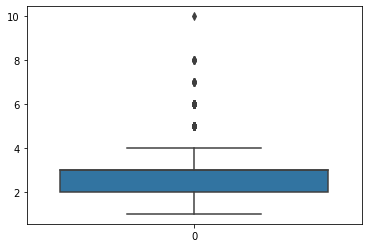

In [19]:
# boxplot

# sns.boxplot(data = Viz_data[["Rooms","Price","Landsize"]],orient='v')
sns.boxplot(data = Viz_data["Rooms"],orient='v')

<AxesSubplot:>

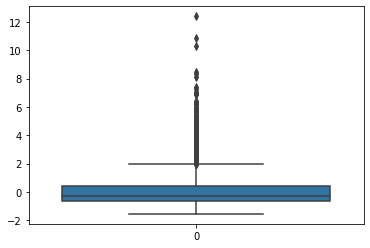

In [21]:
sns.boxplot(data = Viz_data["Price"])

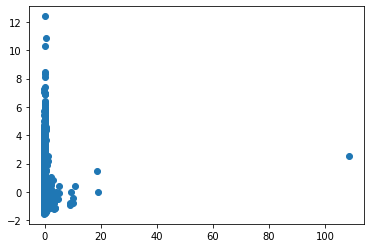

In [25]:
#scatter plot illustration

plt.scatter(Viz_data.Landsize, Viz_data.Price)

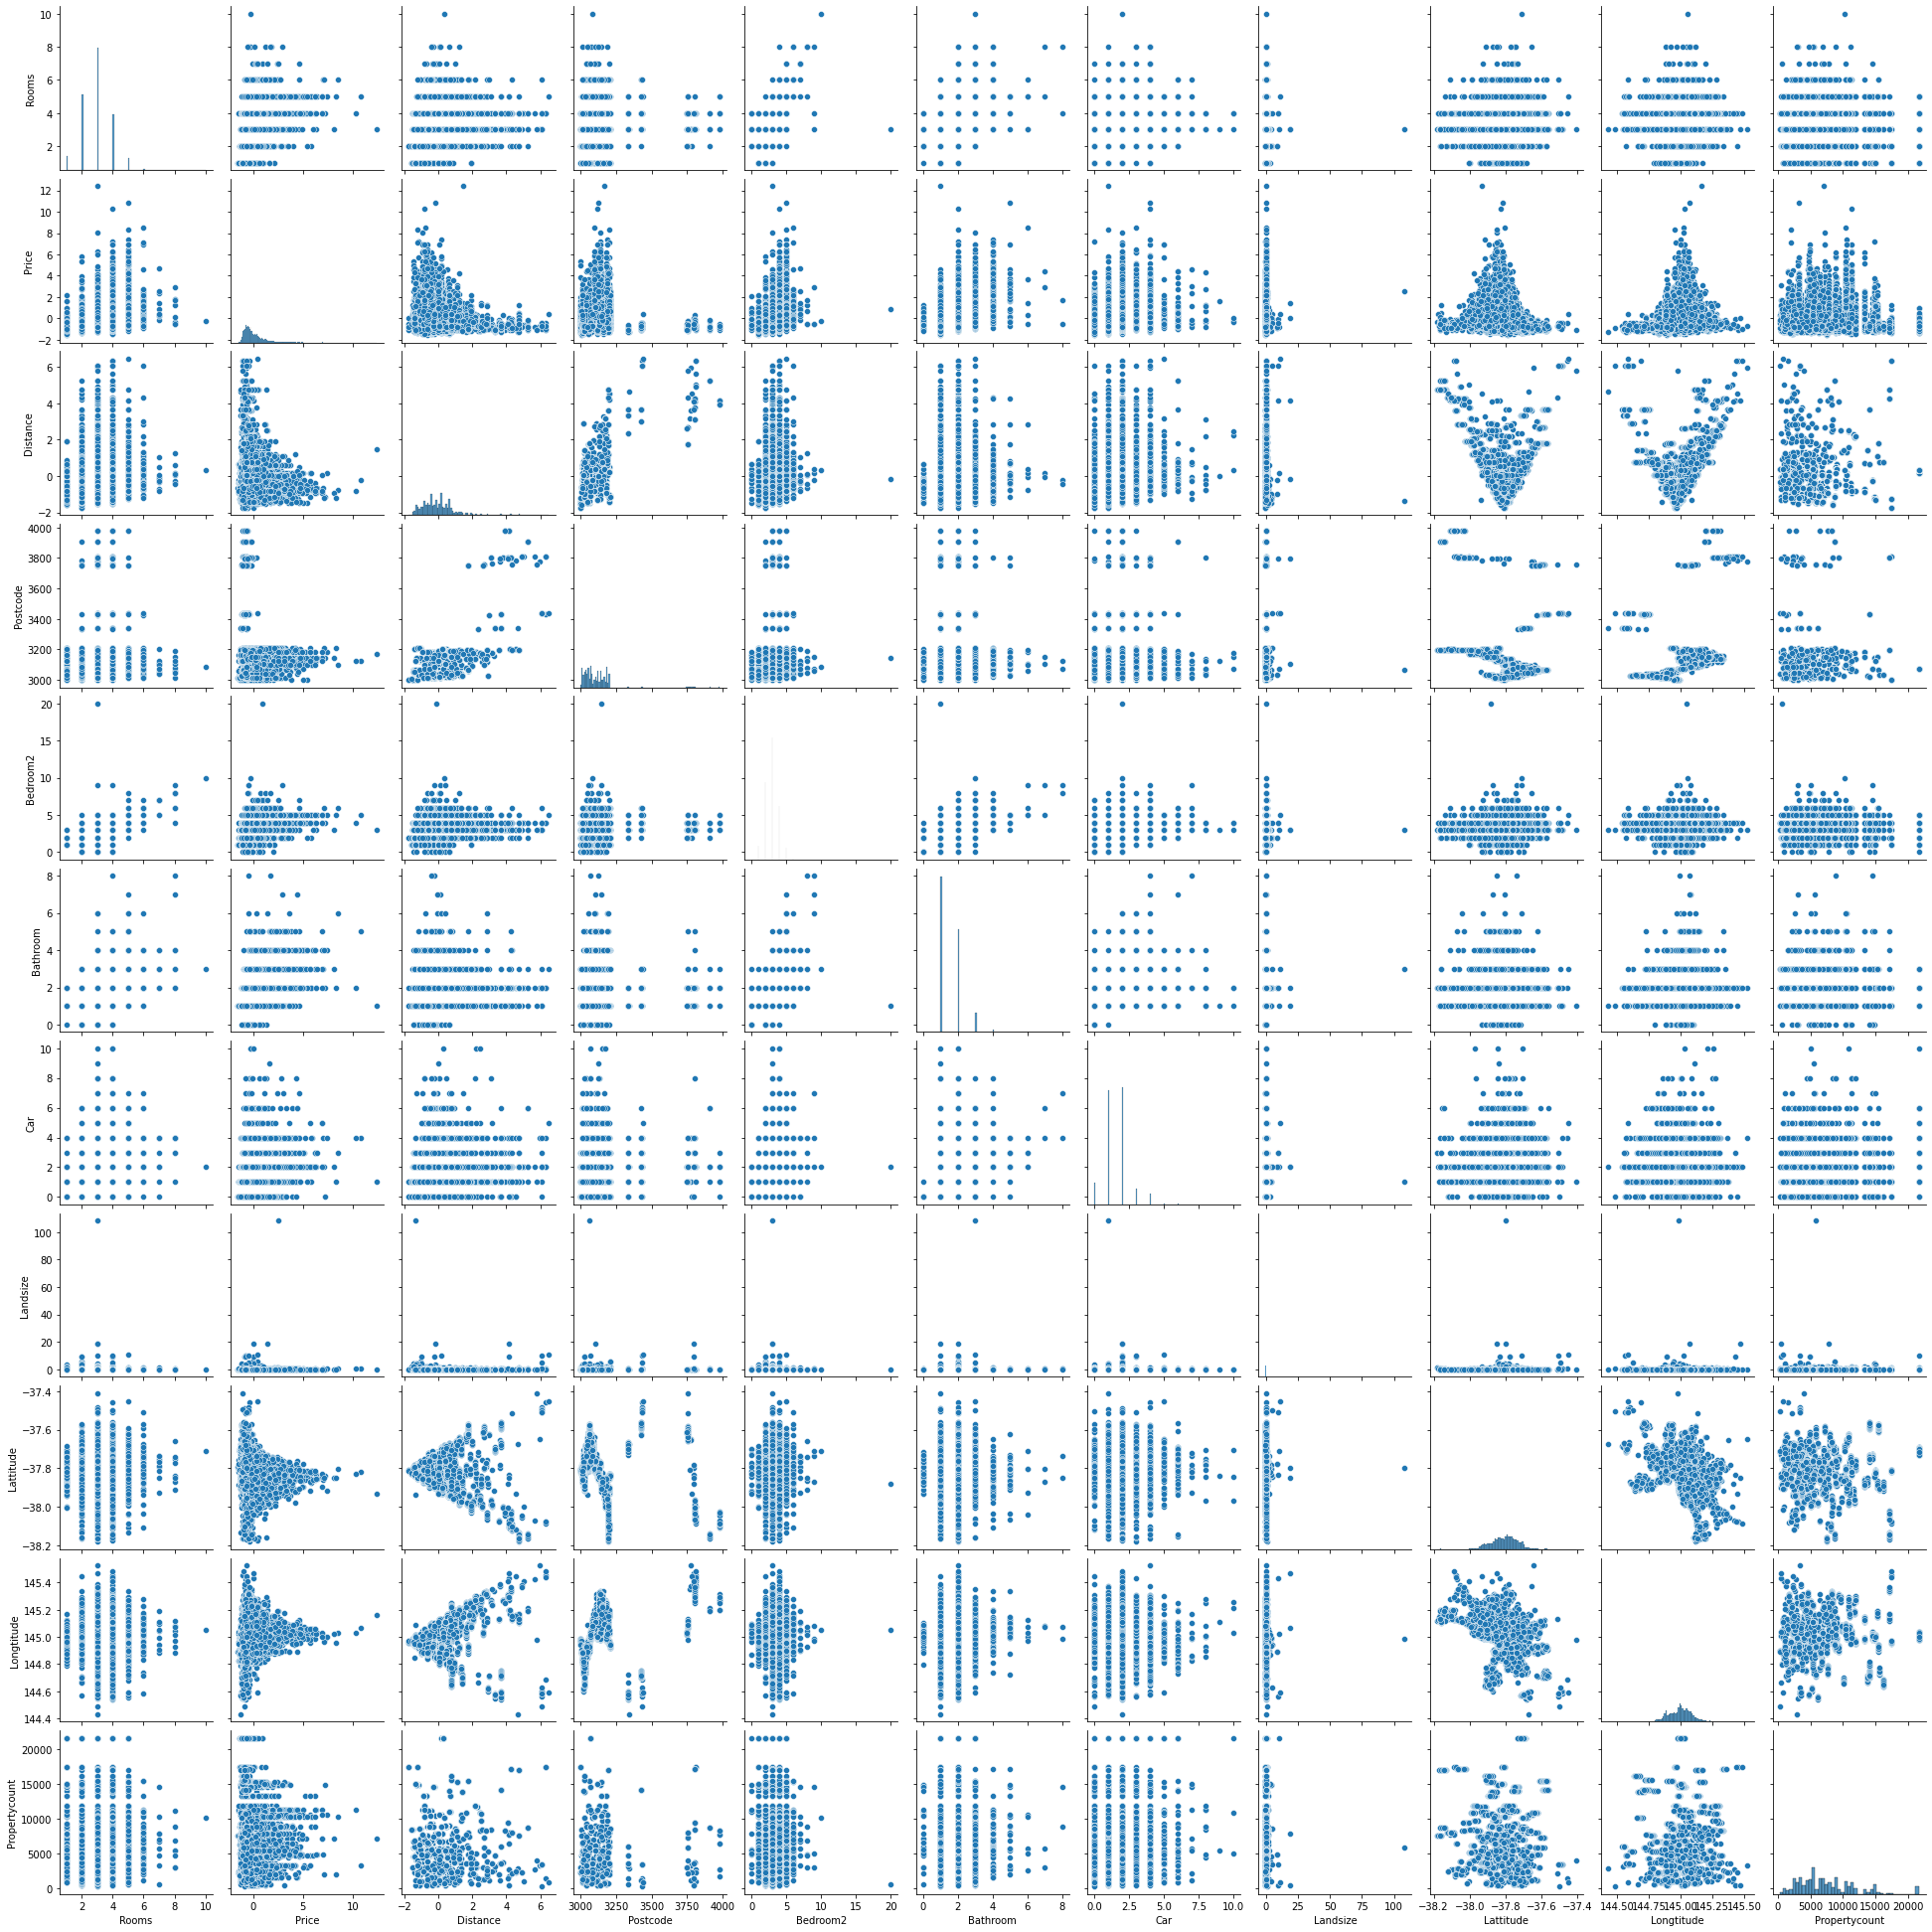

In [26]:
sns.pairplot(Viz_data)

In [28]:
Viz_data.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.406935,0.025678,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.239109,0.037507,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.260596,0.025004,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050514,0.024558,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.403867,0.025646,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.321014,0.037130,-0.070594,0.118971,-0.052201
Car,0.406935,0.239109,0.260596,0.050514,0.403867,0.321014,1.000000,0.026780,-0.002023,0.062929,-0.024344
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026780,1.000000,0.009695,0.010833,-0.006854
Lattitude,0.015948,-0.212934,-0.130723,-0.406104,0.015925,-0.070594,-0.002023,0.009695,1.000000,-0.357634,0.047086
Longtitude,0.100771,0.203656,0.239425,0.445357,0.102238,0.118971,0.062929,0.010833,-0.357634,1.000000,0.065988


<AxesSubplot:>

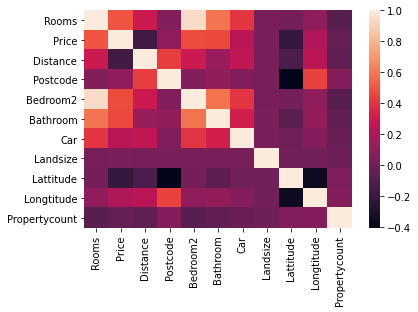

In [27]:
#heatmap
sns.heatmap(Viz_data.corr())

<AxesSubplot:ylabel='None'>

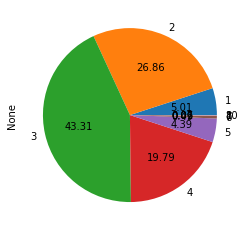

In [34]:
# Pie chart
 
    
Viz_data.groupby('Rooms').size().plot(kind='pie', autopct='%.2f')
# Viz_data.groupby('SellerG').size().plot(kind='pie', autopct='%.2f')